In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

alpha, t, s, k, n = sp.symbols('\u03B1 t s k n', real=True)


Y = sp.Function('Y')(t)  # Y(t)
K = sp.Function('K')(t)  # K(t)
L = sp.Function('L')(t)  # L(t)
k = sp.Function('k')(t)  # k(t)
y = sp.Function('y')(t)  # y(t)



Yfunc = sp.Eq(Y, K**alpha * L**(1-alpha))
yfunc = Yfunc.subs(Y, y*L)
yfuncleft = yfunc.subs(K, k*L).lhs/ L
yfuncright = yfunc.subs(K, k*L).rhs/ L
yfunc = sp.Eq(yfuncleft, yfuncright)

#y(t) = k(t)**alpha

#yfunc = sp.Eq(y, k**alpha)

#S = Netto nyinvesteringer 
#n = befolkningsvekst. eksogent gitt og voksede med konstant rate n
#k(t) = K(t)/L(t)
#k derivert for t = s*y(t)
# L(t) vokser med en eksogent og konstant rate n. L(t)=L(0)*e^(n*t)


#natural log of yfunc
lnyfunc = sp.Eq(sp.log(y), sp.log(k**alpha))
#derivative of lnyfunc
dlnyfunc = sp.Eq(sp.diff(sp.log(y), t), sp.diff(sp.log(k**alpha), t))
#dlnyfunc

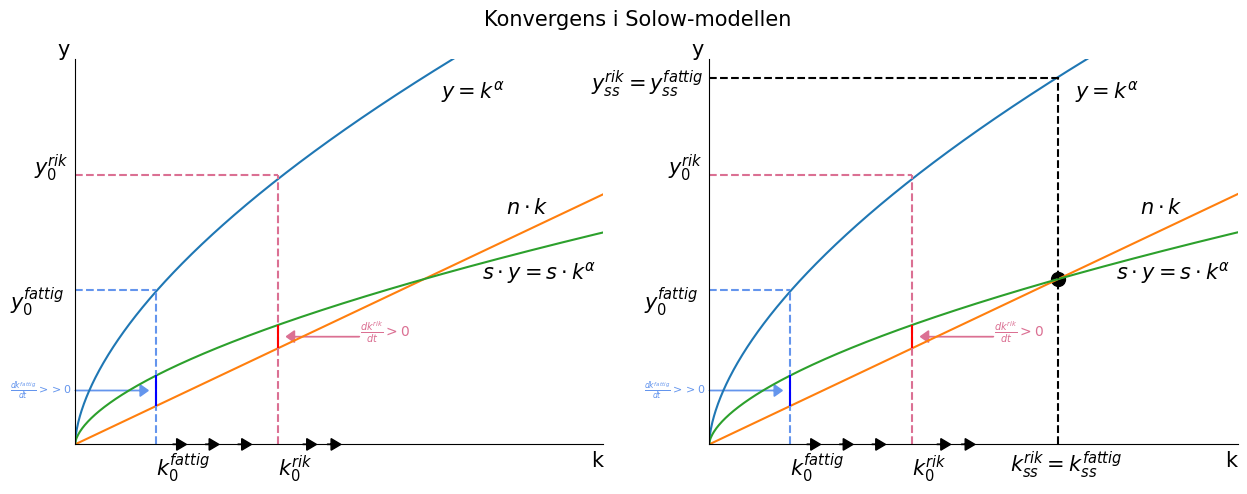

In [2]:
alpha_num = 0.6
eq = sp.Eq(s*k**alpha, n*k)

eq = sp.solve(eq, k)
intersect1 = eq[0].subs(alpha, alpha_num).subs(s, 0.45).subs(n, 0.1)
intersect2 = eq[0].subs(alpha, alpha_num).subs(s, 0.6).subs(n, 0.1)

intersect1 = float(intersect1)
intersect2 = float(intersect2)

def plotfunc(k, alpha):
    return k**alpha

def neeededinv(n, k):
    return n*k

def nettoinv(s, y):
    return s*y

x = np.linspace(0, 100, 1000)

fig, (ax,ax2) = plt.subplots(1,2, figsize=(15, 5))


ax.plot(x, plotfunc(x, alpha_num), label='y(t)')
ax.plot(x, neeededinv(0.1, x), label='n*k(t)')
ax.plot(x, nettoinv(0.45, plotfunc(x, alpha_num)), label='s*y(t)')

ax.text(10, -0.8, r'$k_0^{fattig}$', fontsize=15)
ax.text(-8, 3.5, r'$y_0^{fattig}$', fontsize=15)
ax.vlines(10, 0, 4, linestyle='dashed',color="cornflowerblue")
ax.hlines(4, 0, 10, linestyle='dashed', color="cornflowerblue")
ax.text(25, -0.8, r'$k_0^{rik}$', fontsize=15)
ax.text(-5, 7, r'$y_0^{rik}$', fontsize=15)
ax.vlines(25, 0, 7, linestyle='dashed', color="palevioletred")
ax.hlines(7, 0, 25, linestyle='dashed', color="palevioletred")

# Setting y-axis label and making it horizontal and upper left corner
ax.set_ylabel('y', loc='top', rotation=0, fontsize=15)
# Setting k-axis label
ax.set_xlabel('k', loc='right', fontsize=15)
# Writing the equation for y = k**alpha
ax.text(45, 9, r'$y = k^{\alpha}$', fontsize=15)
# Writing the equation for n*k
ax.text(53, 6, r'$n \cdot k$', fontsize=15)
# Writing the equation for s*y = s*k**alpha
ax.text(50, 4.3, r'$s \cdot y = s \cdot k^{\alpha}$', fontsize=15)

ax.set_xlim(0, 65)
ax.set_ylim(0, 10)

# Making an extra thick line
ax.vlines(10, 1, 1.8,color="blue")
# Arrow pointing to extra thick line from y-axis
ax.arrow(0, 1.4, 8, 0, head_width=0.3, head_length=1, color='cornflowerblue',clip_on=False)
# Text writing the derivative of dk{fattig}/dt >> 0
ax.text(-8, 1.3, r'$\frac{d k^{fattig}}{d t} >> 0$', fontsize=8, color='cornflowerblue')
# Making an extra thick line
ax.vlines(25, 2.5, 3.1,color="red")
# Arrow pointing from the right to the left
ax.arrow(35, 2.8, -8, 0, head_width=0.3, head_length=1, color='palevioletred',clip_on=False)
# Text writing the derivative of dk{rik}/dt > 0
ax.text(35, 2.8, r'$\frac{d k^{rik}}{d t} > 0$', fontsize=10, color='palevioletred')
#Removing spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')


ax.set_xticks([])
ax.set_yticks([])

# showing 3 arrows
for i in range(12, 22, 4):
    ax.arrow(i, 0, 0.5, 0, head_width=0.3, head_length=1.2, fc='black',clip_on=False)

# showing 2 arrows
for i in range(28, 34, 3):
    ax.arrow(i, 0, 0.5, 0, head_width=0.3, head_length=1.2, fc='black',clip_on=False)
    
    

ax2.plot(x, plotfunc(x, alpha_num), label='y(t)')
ax2.plot(x, neeededinv(0.1, x), label='n*k(t)')
ax2.plot(x, nettoinv(0.45, plotfunc(x, alpha_num)), label='s*y(t)')

ax2.text(10, -0.8, r'$k_0^{fattig}$', fontsize=15)
ax2.text(-8, 3.5, r'$y_0^{fattig}$', fontsize=15)
ax2.vlines(10, 0, 4, linestyle='dashed',color="cornflowerblue")
ax2.hlines(4, 0, 10, linestyle='dashed', color="cornflowerblue")
ax2.text(25, -0.8, r'$k_0^{rik}$', fontsize=15)
ax2.text(-5, 7, r'$y_0^{rik}$', fontsize=15)
ax2.vlines(25, 0, 7, linestyle='dashed', color="palevioletred")
ax2.hlines(7, 0, 25, linestyle='dashed', color="palevioletred")

# Setting y-axis label and making it horizontal and upper left corner
ax2.set_ylabel('y', loc='top', rotation=0, fontsize=15)
# Setting k-axis label
ax2.set_xlabel('k', loc='right', fontsize=15)
# Writing the equation for y = k**alpha
ax2.text(45, 9, r'$y = k^{\alpha}$', fontsize=15)
# Writing the equation for n*k
ax2.text(53, 6, r'$n \cdot k$', fontsize=15)
# Writing the equation for s*y = s*k**alpha
ax2.text(50, 4.3, r'$s \cdot y = s \cdot k^{\alpha}$', fontsize=15)

ax2.set_xlim(0, 65)
ax2.set_ylim(0, 10)

# Making an extra thick line
ax2.vlines(10, 1, 1.8,color="blue")
# Arrow pointing to extra thick line from y-axis
ax2.arrow(0, 1.4, 8, 0, head_width=0.3, head_length=1, color='cornflowerblue',clip_on=False)
# Text writing the derivative of dk{fattig}/dt >> 0
ax2.text(-8, 1.3, r'$\frac{d k^{fattig}}{d t} >> 0$', fontsize=8, color='cornflowerblue')
# Making an extra thick line
ax2.vlines(25, 2.5, 3.1,color="red")
# Arrow pointing from the right to the left
ax2.arrow(35, 2.8, -8, 0, head_width=0.3, head_length=1, color='palevioletred',clip_on=False)
# Text writing the derivative of dk{rik}/dt > 0
ax2.text(35, 2.8, r'$\frac{d k^{rik}}{d t} > 0$', fontsize=10, color='palevioletred')
#Removing spines
ax2.spines['top'].set_color('none')
ax2.spines['right'].set_color('none')


ax2.set_xticks([])
ax2.set_yticks([])

ax2.hlines(0.6*plotfunc(intersect1, alpha_num)+3.78, 0, intersect1, linestyle='dashed', color="black")
ax2.vlines(intersect1, 0, nettoinv(0.45, plotfunc(intersect1, alpha_num))+5.25, linestyle='dashed', color="black")
ax2.scatter(intersect1, 0.45*plotfunc(intersect1, alpha_num), color='black', s=100)
# Writing the equation for y^(rik)^ss = y^(fattig)^ss
ax2.text(-14.5, 9.2, r'$y^{rik}_{ss} = y^{fattig}_{ss}$', fontsize=15)
# Writing the equation for k^(rik)^ss = k^(fattig)^ss
ax2.text(37, -0.7, r'$k^{rik}_{ss} = k^{fattig}_{ss}$', fontsize=15)
# showing 3 arrows
for i in range(12, 22, 4):
    ax2.arrow(i, 0, 0.5, 0, head_width=0.3, head_length=1.2, fc='black',clip_on=False)

# showing 2 arrows
for i in range(28, 34, 3):
    ax2.arrow(i, 0, 0.5, 0, head_width=0.3, head_length=1.2, fc='black',clip_on=False)

fig.suptitle('Konvergens i Solow-modellen', fontsize=15)
plt.show()

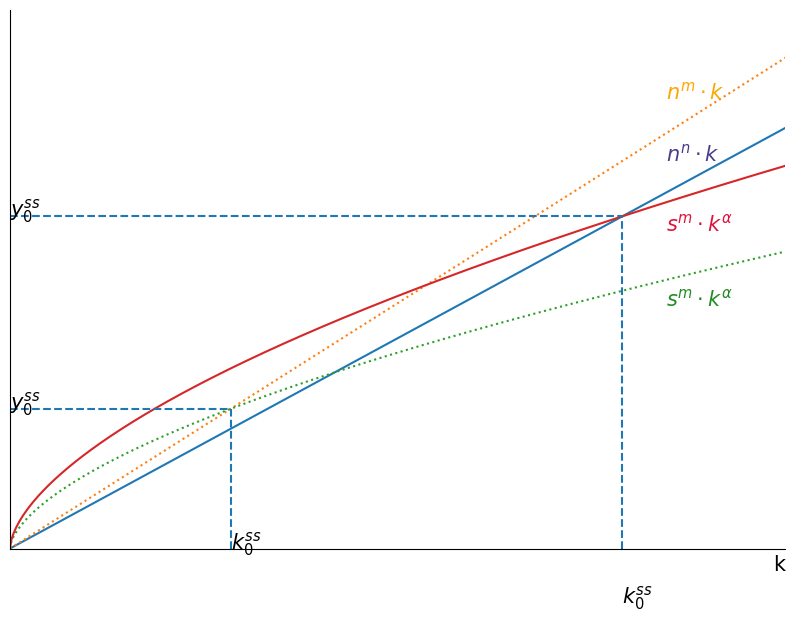

In [13]:
intersect1 = eq[0].subs(alpha, alpha_num).subs(s, 0.45).subs(n, 0.14)
intersect2 = eq[0].subs(alpha, alpha_num).subs(s, 0.58).subs(n, 0.12)

intersect1 = float(intersect1)
intersect2 = float(intersect2)

# Plotting the functions
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(x, neeededinv(0.12, x))
ax.plot(x, neeededinv(0.14, x), linestyle="dotted")
ax.plot(x, nettoinv(0.45, plotfunc(x, alpha_num)), linestyle="dotted")
ax.plot(x, nettoinv(0.58, plotfunc(x, alpha_num)))


# Setting k-axis label
ax.set_xlabel('k', loc='right', fontsize=15)
# Writing the equation for y = k**alpha
ax.text(55, 8.35, r'$n^m \cdot k$', fontsize=15, color='orange')
ax.text(55, 7.2, r'$n^n \cdot k$', fontsize=15, color='darkslateblue')
# Writing the equation for s*y = s*k**alpha
# what is a nice red color
ax.text(55, 5.9, r'$s^m \cdot k^{\alpha}$', fontsize=15, color='crimson')
# Writing the equation for s*y = s*k**alpha
ax.text(55, 4.5, r'$s^m \cdot k^{\alpha}$', fontsize=15, color='forestgreen')

#Removing spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.set_xticks([])
ax.set_yticks([])

# Likevekt 1
ax.text(intersect1, 0, r'$k_0^{ss}$', fontsize=15)
ax.vlines(intersect1, 0, nettoinv(0.45, plotfunc(intersect1, alpha_num)), linestyle='dashed')
ax.text(0, 0.45*plotfunc(intersect1, alpha_num), r'$y_0^{ss}$', fontsize=15)
ax.hlines(0.45*plotfunc(intersect1, alpha_num), 0, intersect1, linestyle='dashed')

# Likevekt 2
ax.text(intersect2, -0.5
        , r'$k_0^{ss}$', fontsize=15)
ax.vlines(intersect2, 0, nettoinv(0.58, plotfunc(intersect2, alpha_num)), linestyle='dashed')
ax.text(0, 0.58*plotfunc(intersect2, alpha_num), r'$y_0^{ss}$', fontsize=15)
ax.hlines(0.58*plotfunc(intersect2, alpha_num), 0, intersect2, linestyle='dashed')

ax.set_xlim(0, 65)
ax.set_ylim(0, 10);

In [4]:
intersect1

42.95673695708277

(0.0, 10.0)

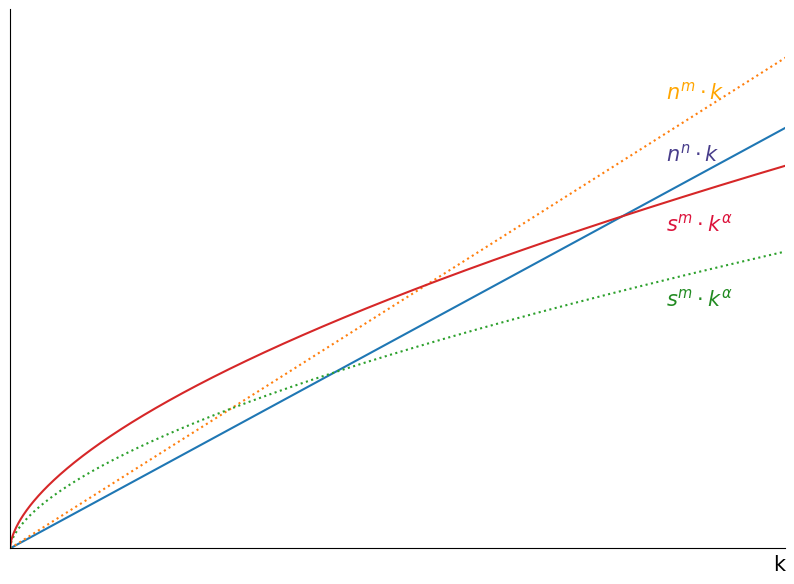

In [5]:
fig, ax2 = plt.subplots(figsize=(10, 7))

ax2.plot(x, neeededinv(0.12, x), label='n*k(t)')
ax2.plot(x, neeededinv(0.14, x), label='n*k(t)', linestyle="dotted")
ax2.plot(x, nettoinv(0.45, plotfunc(x, alpha_num)), linestyle="dotted", label='s*y(t)')
ax2.plot(x, nettoinv(0.58, plotfunc(x, alpha_num)), label='s*y(t)')
ax2.text(55, 8.35, r'$n^m \cdot k$', fontsize=15, color='orange')
# Writing the equation for n*k
ax2.text(55, 7.2, r'$n^n \cdot k$', fontsize=15, color='darkslateblue')
# Writing the equation for s*y = s*k**alpha
# what is a nice red color
ax2.text(55, 5.9, r'$s^m \cdot k^{\alpha}$', fontsize=15, color='crimson')
# Writing the equation for s*y = s*k**alpha
ax2.text(55, 4.5, r'$s^m \cdot k^{\alpha}$', fontsize=15, color='forestgreen')


# Setting k-axis label
ax2.set_xlabel('k', loc='right', fontsize=15)
#Removing spines
ax2.spines['top'].set_color('none')
ax2.spines['right'].set_color('none')

ax2.set_xticks([])
ax2.set_yticks([])

ax2.set_xlim(0, 65)
ax2.set_ylim(0, 10)